# spam ham classfier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:

spam_df=pd.read_csv(r"C:\dl_projects\spam_ham_classifier\data\emails.csv")

In [3]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
spam_df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Visulaize the data

In [7]:
ham=spam_df[spam_df['spam']==0]
spam=spam_df[spam_df["spam"]==1]

In [8]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
spam_perc=len(spam)/len(spam_df)*100
spam_perc


23.88268156424581

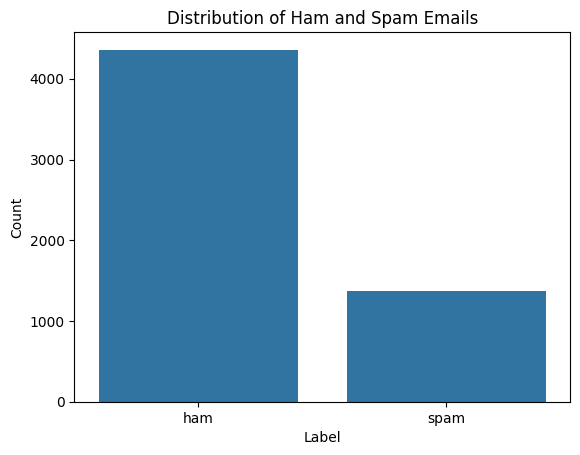

In [ ]:
sns.countplot(x=spam_df["spam"])
plt.xticks([0, 1], ["ham", "spam"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Ham and Spam Emails")
plt.show()


# Aplly the CountVectorize

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
veciotrzise=CountVectorizer()
spam_vectorize=veciotrzise.fit_transform(spam_df["text"])

In [20]:

veciotrzise.get_feature_names_out()[:5]


array(['00', '000', '0000', '000000', '00000000'], dtype=object)

In [22]:
spam_vectorize.shape

(5728, 37303)

# separte the train and test data

In [25]:
X=spam_vectorize
Y=spam_df["spam"]

In [26]:
X.shape

(5728, 37303)

In [27]:
Y.shape

(5728,)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
x_train.shape

(4582, 37303)

In [29]:
x_test.shape

(1146, 37303)

# create the model

In [30]:
from sklearn.naive_bayes import MultinomialNB
classiier=MultinomialNB()
classiier.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


evaluating the model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [35]:
model_predict=classiier.predict(x_test)
model_predict

array([0, 0, 0, ..., 1, 0, 0], shape=(1146,))

In [36]:
cm=confusion_matrix(y_test,model_predict)

<Axes: >

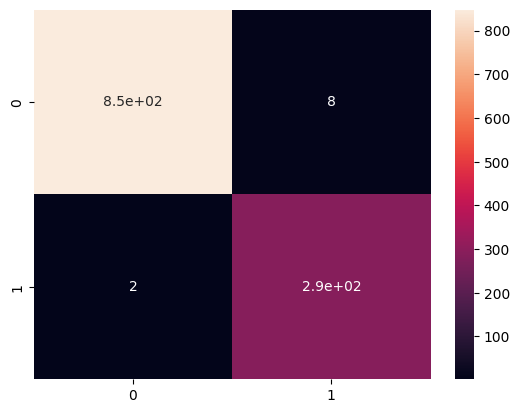

In [37]:
sns.heatmap(cm,annot=True)

In [40]:
cr=classification_report(y_test,model_predict)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

